<a href="https://colab.research.google.com/github/MuradAle/CSC448/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab button [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MuradAle/CSC448/blob/main/MachineLearning.ipynb)

Abstract

There are two datasets that I choose are Diamonds and Heart attack possibility. I choose Diamonds cause u can build pickaxe :))). But in reallity its a good trade if you have money to buy and sell diamonds. I will use a Linear Regression to predict the carat of the diamond base on heir price. For the Heart attack possibility i will use K-Nearest Neighbors to predict if peson has a higher risk of heart attack or not. Also to check our Linear Regression and K-Nearest Neighbors we are going to use different data, just to see if our methods are working and give use good output. 

In [4]:
#Section 1 

# import the necessary libraries
# the libraries that i am using are "sklearn", "pandas", "matplotlib", and "numpy"
# sklearn is for scientific computing 
# pandas is for data handling and processing
# matplotlib is for plotting
# numpy is for base in array calculation and data summarization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# load the datasset
# we using pandas to read dataset
# this data is read into a dataframe and its named diamonds

url = 'https://raw.githubusercontent.com/MuradAle/CSC448/main/diamonds.csv'
diamonds = pd.read_csv(url, index_col=0)

#diamonds = pd.read_csv('diamonds.csv')

# following information is avaliable for us
# Lets use pandas to print first 15 rows of dataset
result = diamonds.head(15)
print("First 15 rows of the DataFrame:")
result.head(15)

First 15 rows of the DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
label,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


By looking at all this data, we gonna some tables. We are not going to use all data for this project. We will only need 2 columns, and they are will be Carat and Price. There is no empty data anywhere in this data, so we are not gonna use any cleaning command

The 2 columns that we will use are:

Carat - A carat is a unit for measuring the weight of diamonds and other precious stones.

Price - Value of the Carat

In [5]:
Carat_Price = diamonds[["price","carat"]]
Carat_Price.head(15)

,price,carat
label,,
1,326,0.23
2,326,0.21
3,327,0.23
4,334,0.29
5,335,0.31
6,336,0.24
7,336,0.24
8,337,0.26
9,337,0.22


Text(0, 0.5, 'carat')

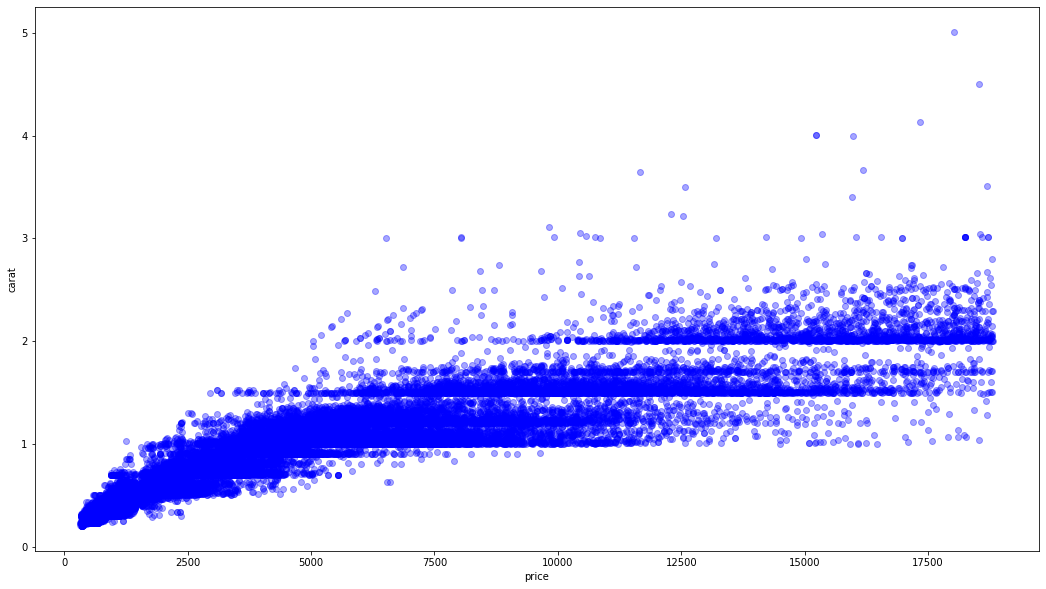

In [6]:
#increase size of matplotlib chart
plt.figure(figsize=(18, 10))

#in bottom, this how we read the data into pandas
plt.scatter(Carat_Price['price'], Carat_Price['carat'], color = 'blue', alpha = 0.35)
plt.xlabel("price")
plt.ylabel("carat")

#bottom chart will show us what data we have

In [7]:
from sklearn.model_selection import train_test_split

# from variables we choose Price to be predictor variable, beacuse of Price we can know what is carat
# response variable will be Carat
X = Carat_Price['price']
Y = Carat_Price['carat']

# the training set is used to train the model and the test set is used to evaluate how good the models is
# We use train test split function (sklearn Library) to divide data into training and test sets 
# after we split the data into training and test fit we first cast the data object which are series into one-dimensional arrays
# and we plot them to see the relationship between response and predict variables
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X, Y)

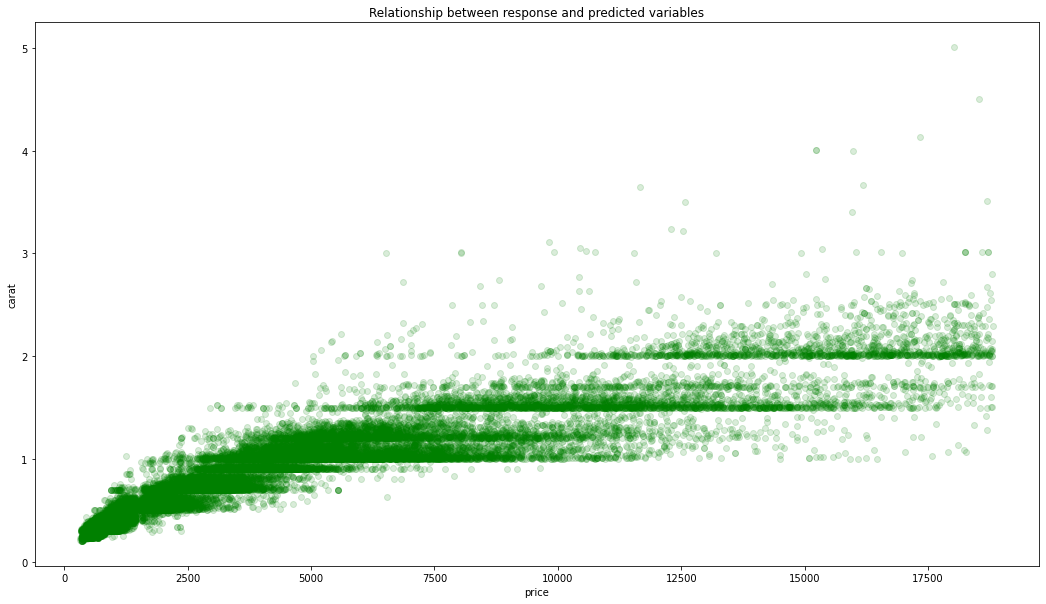

In [8]:
x_training_set, x_test_set, y_training_set, y_test_set = x_training_set.values, x_test_set.values, y_training_set.values, y_test_set.values
x_training_set, x_test_set, y_training_set, y_test_set = x_training_set.reshape(-1,1), x_test_set.reshape(-1,1), y_training_set.reshape(-1,1), y_test_set.reshape(-1,1)
plt.figure(figsize=(18, 10))
plt.title('Relationship between response and predicted variables')
plt.scatter(x_training_set, y_training_set, color = 'green', alpha=0.15)
plt.xlabel("price")
plt.ylabel("carat")
plt.show()

#at bottom we can see relation ship between the response and predicted variables 

In [9]:
# we use the Linear regression class to model the data that we have already stored and we linked the coefficients
lm = linear_model.LinearRegression()
lm.fit(x_training_set, y_training_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

r square:  0.8560194290036157
mean squared error:  0.032050328285055774


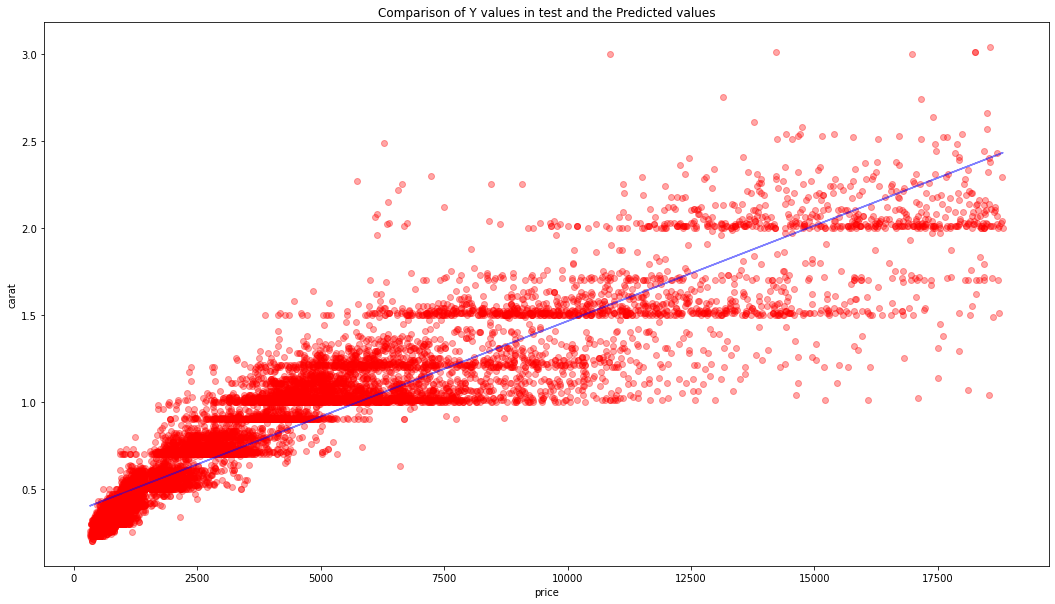

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# we can use libraries core functions to find score of the models, which determines how much of the variable in the data is beignexplained by the model
# r-square also called co-efficient of determination and it is a statistical measure of how close the data is to the fitted to the regression line.
# the value is between 0 and 100% and its shows how effective the model is in modeling the variability of the reponse data about its mean. 

# R^2 (coefficient of determination) regression score function.
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected value of y, disregarding the input features, would get an R^2 score of 0.0.

# We want to make predictions using the model. So we will use the predict function of the linear regression model to predict on the tese set and using 
# predictions that we have made we calculate the coefficients of the determination to see how well we do. 
# our value is 0.85085776397097 and this is a good value for linear regression. (Anything bigger then 0.70 is considered god for linear regression)
# We also calculate the mean square error. Mean square error is the average squared difference between the astimated values and what is etimated.
# The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.

y_predicted = lm.predict(x_test_set)

r_square_score = r2_score(y_test_set, y_predicted)
print('r square: ', r_square_score)

mse = mean_squared_error(y_test_set, y_predicted)
print('mean squared error: ', mse)

plt.figure(figsize=(18, 10))
plt.title('Comparison of Y values in test and the Predicted values')
plt.plot(x_test_set, y_predicted, color = 'blue', alpha = 0.5)
plt.scatter(x_test_set, y_test_set, color = 'red', alpha = 0.35)
plt.xlabel("price")
plt.ylabel("carat")
plt.show()

# Base on this outputs, the model is very effective predictor of price on carat. 
# Remeber 3 diamonds with 2 wood sticks makes a pickaxe. 

In [11]:
print(lm.predict([[2757]])) # well it closed to data (0.6692505 which is 0.7 Carat)
print(lm.predict([[436]])) 
print(lm.predict([[15000]]))
#Base on input of price and putput of carat we are geting close to the data that we have. 

[[0.6693413]]
[[0.41460155]]
[[2.01306332]]


In [12]:
#############################TEST##########################################TEST#############################################################TEST####################

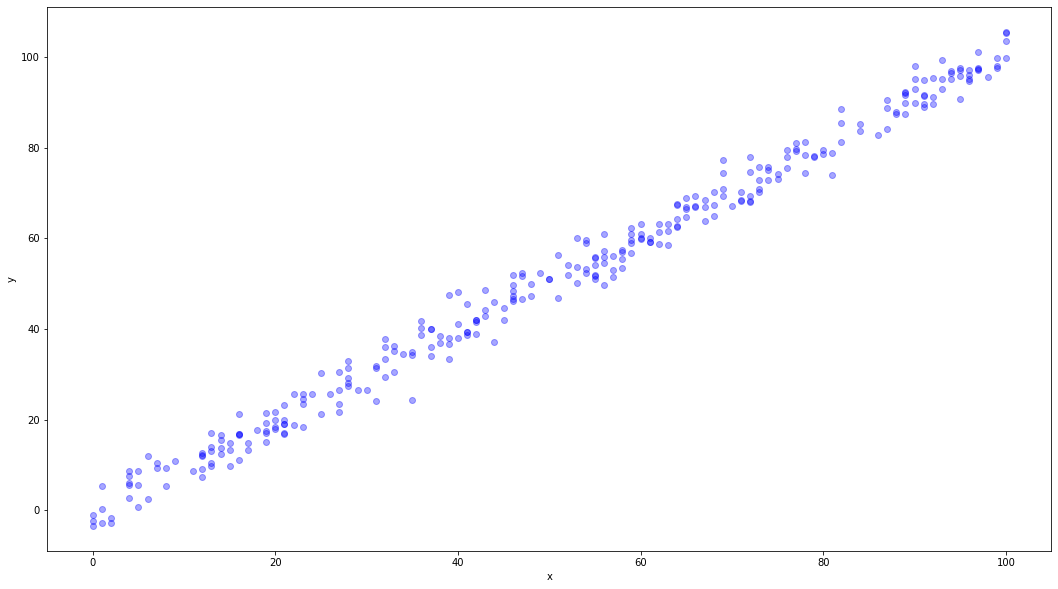

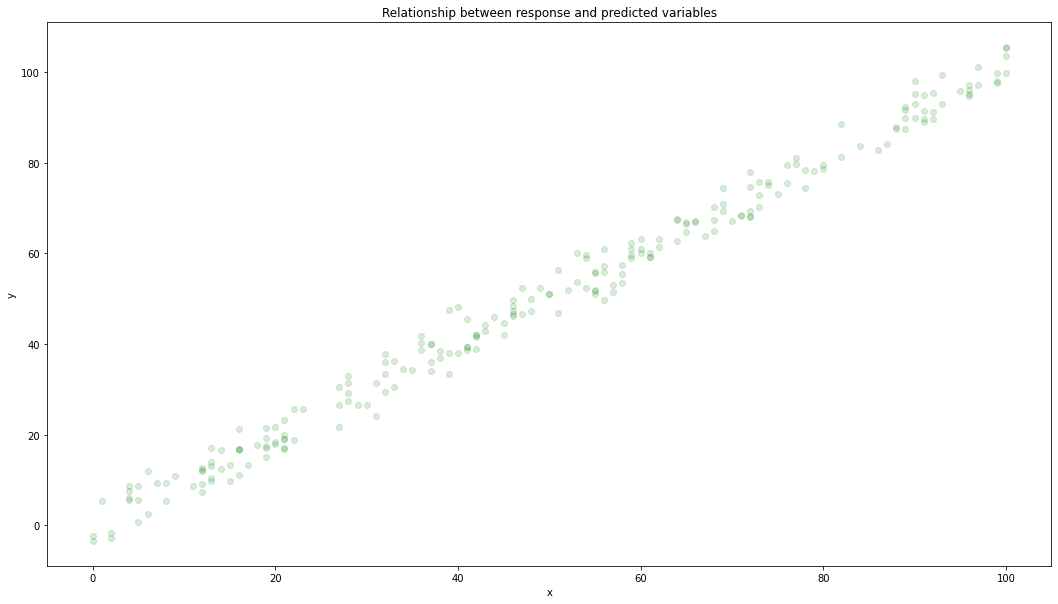

r square:  0.9888957640859646
mean squared error:  9.37728531412739


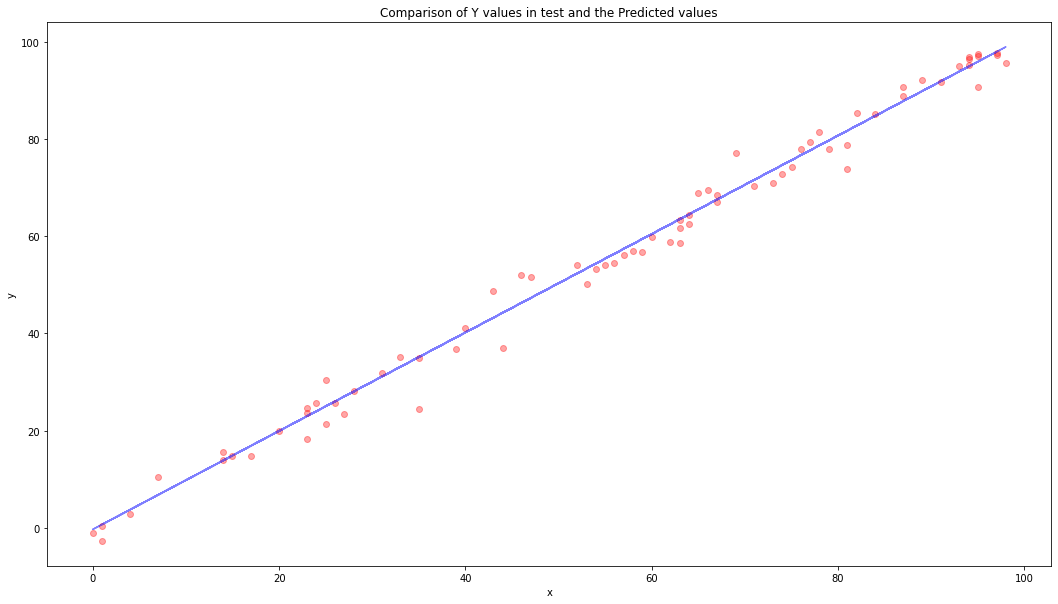

In [13]:
# I used same model but with different dataset
# We will check what difference we have from data before
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

url = 'https://raw.githubusercontent.com/MuradAle/CSC448/main/test.csv'
df1 = pd.read_csv(url)

df1.head(15)
testxy = df1[["x","y"]]
plt.figure(figsize=(18, 10))
plt.scatter(df1['x'], df1['y'], color = 'blue', alpha = 0.35)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

from sklearn.model_selection import train_test_split

X1 = testxy['x']
Y1 = testxy['y']

x1_training_set, x1_test_set, y1_training_set, y1_test_set = train_test_split(X1, Y1)

x1_training_set, x1_test_set, y1_training_set, y1_test_set = x1_training_set.values, x1_test_set.values, y1_training_set.values, y1_test_set.values
x1_training_set, x1_test_set, y1_training_set, y1_test_set = x1_training_set.reshape(-1,1), x1_test_set.reshape(-1,1), y1_training_set.reshape(-1,1), y1_test_set.reshape(-1,1)
plt.figure(figsize=(18, 10))
plt.title('Relationship between response and predicted variables')
plt.scatter(x1_training_set, y1_training_set, color = 'green', alpha=0.15)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

lm = linear_model.LinearRegression()
lm.fit(x1_training_set, y1_training_set)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y1_predicted = lm.predict(x1_test_set)

r1_square_score = r2_score(y1_test_set, y1_predicted)
print('r square: ', r1_square_score)

mse = mean_squared_error(y1_test_set, y1_predicted)
print('mean squared error: ', mse)

plt.figure(figsize=(18, 10))
plt.title('Comparison of Y values in test and the Predicted values')
plt.plot(x1_test_set, y1_predicted, color = 'blue', alpha = 0.5)
plt.scatter(x1_test_set, y1_test_set, color = 'red', alpha = 0.35)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
##########################END#TEST#####################################END#TEST#########################################################END#TEST####################

In [15]:
###############Classification#####################################Classification##################################################Classification####################

For the Classification Dataset I will use K-Nearest Neighbors little history that i found in wikipedia
The k-nearest neighbors algorithm (k-NN) is a non-parametric classification method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in data set. The output depends on whether k-NN is used for classification or regression.

In the k-NN classification, the output is class membership. An object is classified by the multiple voices of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. If k = 1, then the object is simply assigned to the class of that single nearest neighbor. In k-NN regression, the output is the value of an object property. This value is the average of the k-values of the nearest neighbor.
I will not use all dataset, i will use some parts of the data. 

In [16]:
#took this data for cheking
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

url = 'https://raw.githubusercontent.com/MuradAle/CSC448/main/heart.csv'
dfa = pd.read_csv(url)

#dfa = pd.read_csv('heart.csv')
new_dfa = dfa.dropna()# we clean data from empty data
new_dfa.head(15)

#new_dfa.iloc[:100]
# i could use iloc to make smaller my data, but i have around 300 rows

#Data explanation
# age - age of person
# sex - male/female
# cp - chest pain type (4 values)
# trestbps - resting blood pressure
# chol - serum cholestoral in mg/dl
# fbs - fasting blood sugar > 120 mg/dl
# restecg - resting electrocardiographic results (values 0,1,2)
# thalach - maximum heart rate achieved
# exang - exercise induced angina
# oldpeak - ST depression induced by exercise relative to rest
# slope - the slope of the peak exercise ST segment
# ca - number of major vessels (0-3) colored by flourosopy
# thal - some levels: 0 = normal; 1 = fixed defect; 2 = reversable defect
# target - some levels: 0= less chance of heart attack 1= more chance of heart attack

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


1    165
0    138
Name: target, dtype: int64


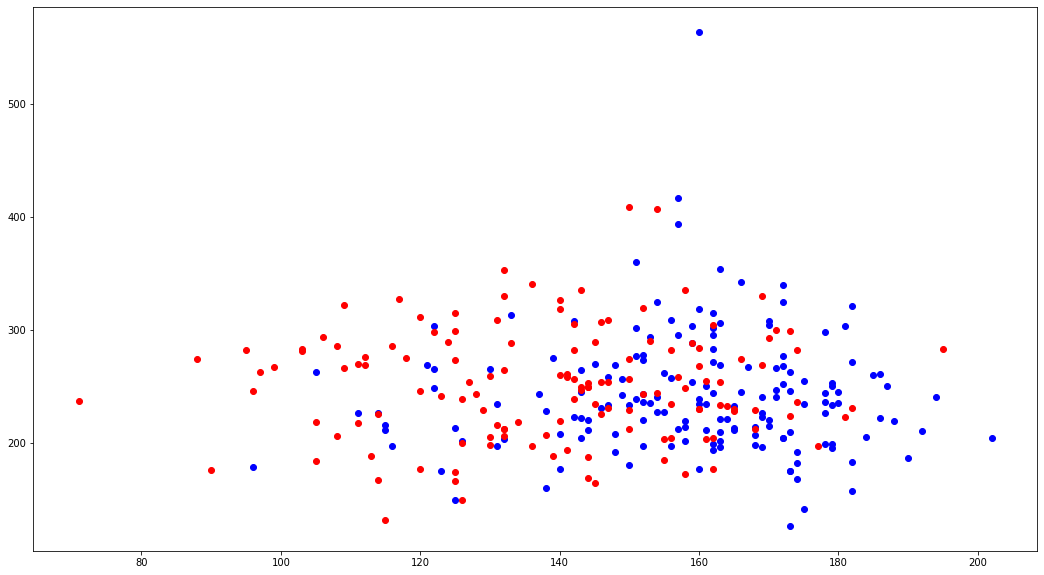

In [17]:
#checking how many unique fruit names are present in the dataset
print(new_dfa['target'].value_counts())

#we will print our data 
target_0_data=new_dfa[new_dfa['target']==1]
target_1_data=new_dfa[new_dfa['target']==0]

plt.figure(figsize=(18, 10))

plt.scatter(target_0_data['thalach'], target_0_data['chol'], color = 'blue')
plt.scatter(target_1_data['thalach'], target_1_data['chol'], color = 'red')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X=new_dfa[['age','sex','trestbps','chol','thalach']]
Y=new_dfa['target']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.7) # 70% training and 30% test

#Create KNN Classifier
knn=KNeighborsClassifier()
#Train the model using the training sets
knn.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
knn.score(X_test,y_test)

0.596244131455399

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

a = knn.predict([['38','0','142','243','125']])# not target
if a == 1:
    print("target")
else:
    print("not target")

not target


In [20]:
a = knn.predict([['41','1','136','252','190']]) # target
if a == 1:
    print("target")
else:
    print("not target")

target


In [21]:
# The output that we get from KNN is correct, the rate of accuracy is more then 60%.

In [22]:
###########END#Classification#################################END#Classification##############################################END#Classification####################

In [23]:
#############################TEST##########################################TEST#############################################################TEST####################

In [24]:
#took this data for cheking
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

url = 'https://raw.githubusercontent.com/MuradAle/CSC448/main/Iris_Data.csv'
df = pd.read_csv(url)

#df = pd.read_csv('Iris_Data.csv')
new_df = df.dropna()# we clean data from empty data
print(new_df.head(15))

    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64


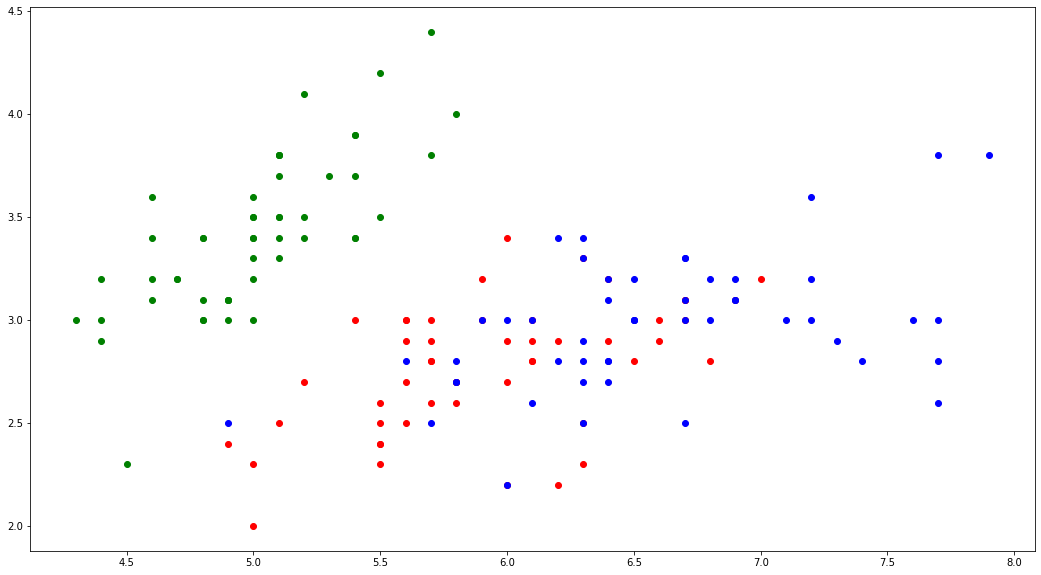

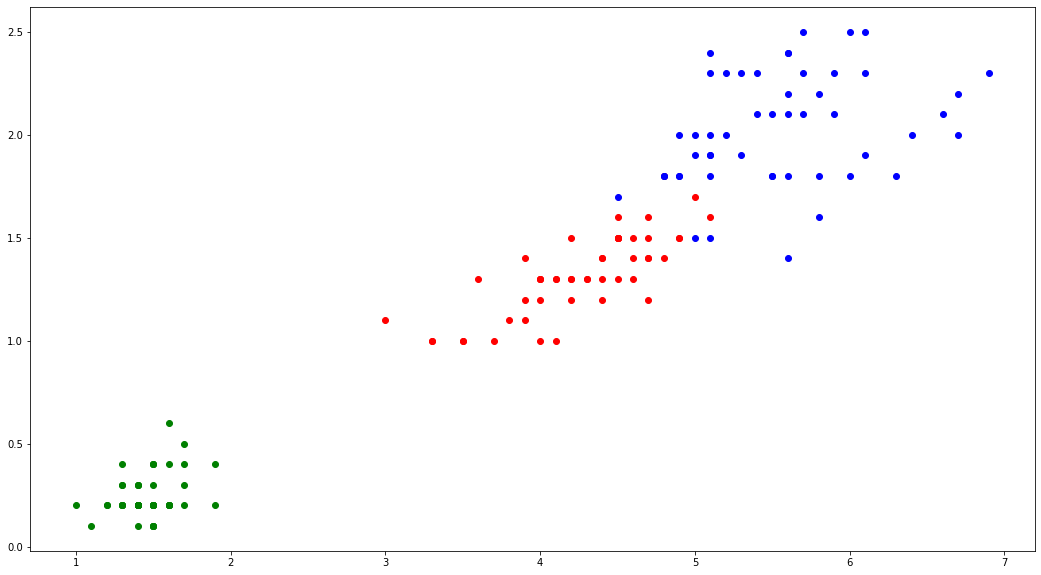

In [25]:
#checking how many unique fruit names are present in the dataset
print(new_df['species'].value_counts())

#we will pr
Iris_versicolor_data=new_df[new_df['species']=='Iris-versicolor']
Iris_virginica_data=new_df[new_df['species']=='Iris-virginica']
Iris_setosa_data=new_df[new_df['species']=='Iris-setosa']

plt.figure(figsize=(18, 10))

plt.scatter(Iris_versicolor_data['sepal_length'], Iris_versicolor_data['sepal_width'], color = 'red')
plt.scatter(Iris_virginica_data['sepal_length'], Iris_virginica_data['sepal_width'], color = 'blue')
plt.scatter(Iris_setosa_data['sepal_length'], Iris_setosa_data['sepal_width'], color = 'green')
plt.show()

plt.figure(figsize=(18, 10))

plt.scatter(Iris_versicolor_data['petal_length'], Iris_versicolor_data['petal_width'], color = 'red')
plt.scatter(Iris_virginica_data['petal_length'], Iris_virginica_data['petal_width'], color = 'blue')
plt.scatter(Iris_setosa_data['petal_length'], Iris_setosa_data['petal_width'], color = 'green')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X=new_df[['sepal_length','sepal_width','petal_length','petal_width']]
Y=new_df['species']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3) # 70% training and 30% test

In [27]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.823810,3.065714,3.777143,1.207619
std,0.823399,0.451670,1.777815,0.764060
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.300000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
X_test.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000
mean,5.888889,3.026667,3.715556,1.177778
std,0.846442,0.391617,1.751876,0.769264
min,4.400000,2.200000,1.200000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.500000,3.200000,5.000000,1.800000
max,7.700000,3.900000,6.600000,2.500000


In [29]:
#Create KNN Classifier
knn=KNeighborsClassifier()
#Train the model using the training sets
knn.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
knn.score(X_test,y_test)
# 90% and more, So it is good accuracy

0.9777777777777777

In [30]:
a = knn.predict([['7','3','6','2']])
b = knn.predict([['1','1','1','1']])

In [31]:
print(a)
print(b)

['Iris-virginica']
['Iris-setosa']


In [32]:
##########################END#TEST#####################################END#TEST#########################################################END#TEST####################

Conclusion 

In this assignment we were looiking into Linear Regression and K-Nearest Neighbors. 
There are two datasets that I choose to work with. I choose Diamonds carat and Heart attack possibility. 
I will use a Linear Regression to predict the carat of the diamond base on heir price. 
For the Heart attack possibility we used KNN and to find errors we used Model Accuracy, and its 60%+ accurate. 
Its not great but by using prediction there is a more than 60% to get correct answer. 
Also to check our Linear Regression and K-Nearest Neighbors we are going to use different data, just to see if our methods are working and give use good output.

I used two Test data sets to check my methods. One dataset contains points of X Y, we used it for Linear Regression method to find best fit line. For the Classification we used some classification dataset which been found in kaggle, and it was called classification example (so i use it to check mine KNN).

I found interesting is in Linear Regression about diamonds charts. Cuase by looking at it, its better to use y=ln(x)+A equation to find best fit line, but by looking at r square and mse, they give good numbers, but its looks like its not correct.

To extend project further I was thinking maybe use all methods for classifications and see which one is fastes, accurate, and both. Create own data, and try to work with it.
